주피터노트북용 matplot 한글코드

In [86]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

판다스 임포트

In [1]:
import pandas as pd

파일 불러오기

In [62]:
df = pd.read_csv("../03/03_암발생자수.csv", encoding='cp949')
df.head()

,24개 암종별,성별,연령별,2019,2019.1
0,24개 암종별,성별,연령별,발생자수 (명),조발생률 (명/10만명)
1,모든 암(C00-C96),계,계,254718,496.2
2,모든 암(C00-C96),계,0-4세,406,21.3
3,모든 암(C00-C96),계,5-9세,220,9.5
4,모든 암(C00-C96),계,10-14세,300,13.0


열이름 변경

In [64]:
df.columns = ["암종별", "성별", "연령별", "발생자수", "조발생률"]

열 데이터 타입 확인

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


1행 제거

In [7]:
# 행 인덱스 확인
df.index
# 파이썬에서 Range가 붙으면 마지막은 포함안함

RangeIndex(start=0, stop=1501, step=1)

In [23]:
# 열이름 확인
df.columns

Index(['암종별', '성별', '연령별', '발생자수', '조발생률'], dtype='object')

In [9]:
# 행, 열 조회
df.loc[0,'암종별']

'24개 암종별'

In [10]:
# 열 인덱스 사용하여 조회
df.iloc[0, 0]

'24개 암종별'

In [65]:
# 첫행 제외하고 모두 조회 > df로 넣어주기
df = df.loc[1:,:]

특정 변수 조회

In [5]:
df['암종별']

0                 24개 암종별
1           모든 암(C00-C96)
2           모든 암(C00-C96)
3           모든 암(C00-C96)
4           모든 암(C00-C96)
              ...        
1496    기타 암(Re. C00-C96)
1497    기타 암(Re. C00-C96)
1498    기타 암(Re. C00-C96)
1499    기타 암(Re. C00-C96)
1500    기타 암(Re. C00-C96)
Name: 암종별, Length: 1501, dtype: object

특정 행, 열 자료 추출

In [12]:
df.loc[[1,3],['암종별','발생자수']]

,암종별,발생자수
1,모든 암(C00-C96),254718
3,모든 암(C00-C96),220


넘파이 임포트

In [13]:
import numpy as np

값 변경: - => 0

In [14]:
df['발생자수'] = np.where(df['발생자수'] == '-', 0, df['발생자수'])
df['조발생률'] = np.where(df['조발생률'] == '-', 0, df['조발생률'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1501 non-null   object
 1   성별      1501 non-null   object
 2   연령별     1501 non-null   object
 3   발생자수    1501 non-null   object
 4   조발생률    1501 non-null   object
dtypes: object(5)
memory usage: 58.8+ KB


In [58]:
df['발생자수']

1       254718
2          406
3          220
4          300
5          583
         ...  
1496      1096
1497      1357
1498      1420
1499      1273
1500         -
Name: 발생자수, Length: 1500, dtype: object

데이터타입 변경(형변환)

In [29]:
df['발생자수'] = df['발생자수'].astype('int')

In [30]:
df['조발생률'] = pd.to_numeric(df['조발생률'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int32  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int32(1), object(3)
memory usage: 52.9+ KB


In [59]:
temp = list(df['발생자수'])
temp = [int(s.replace('-','0')) for s in temp]
df['발생자수'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   암종별     1500 non-null   object
 1   성별      1500 non-null   object
 2   연령별     1500 non-null   object
 3   발생자수    1500 non-null   int64 
 4   조발생률    1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [61]:
temp = list(df['조발생률'])
temp = [float(s.replace('-','0')) for s in temp]
df['조발생률'] = temp
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   int64  
 4   조발생률    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [68]:
# 함수로 만들기
def funCol(col, df):
  temp = list(df[col])
  temp = [float(s.replace('-','0')) for s in temp]
  df[col] = temp

In [ ]:
for c in ['발생자수', '조발생률']:
  funCol(c, df)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 1 to 1500
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   암종별     1500 non-null   object 
 1   성별      1500 non-null   object 
 2   연령별     1500 non-null   object 
 3   발생자수    1500 non-null   float64
 4   조발생률    1500 non-null   float64
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


데이터셋 조회

In [44]:
df['암종별'].unique()
lt = list(df['암종별'].unique())
print(lt)
lt = [s[-3:-1] for s in lt]
print(lt)

['모든 암(C00-C96)', '입술, 구강 및 인두(C00-C14)', '식도(C15)', '위(C16)', '대장(C18-C20)', '간(C22)', '담낭 및 기타 담도(C23-C24)', '췌장(C25)', '후두(C32)', '폐(C33-C34)', '유방(C50)', '자궁경부(C53)', '자궁체부(C54)', '난소(C56)', '전립선(C61)', '고환(C62)', '신장(C64)', '방광(C67)', '뇌 및 중추신경계(C70-C72)', '갑상선(C73)', '호지킨 림프종(C81)', '비호지킨 림프종(C82-C86,C96)', '다발성 골수종(C90)', '백혈병(C91-C95)', '기타 암(Re. C00-C96)']
['96', '14', '15', '16', '20', '22', '24', '25', '32', '34', '50', '53', '54', '56', '61', '62', '64', '67', '72', '73', '81', '96', '90', '95', '96']


In [45]:
lt = [int(s) for s in lt]
print(lt)

[96, 14, 15, 16, 20, 22, 24, 25, 32, 34, 50, 53, 54, 56, 61, 62, 64, 67, 72, 73, 81, 96, 90, 95, 96]


필터링

- 판다스에서 조건을 쓸 때는 기호 사용

In [72]:
df.head()

,암종별,성별,연령별,발생자수,조발생률
1,모든 암(C00-C96),계,계,254718.0,496.2
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4


In [90]:
# 암종별 : 모든 암, 연령별 : 계 x, 성별 : 계 o
# df1 = df[(df['암종별']=='모든 암(C00-C96)') & (df['연령별']!="계") & (df['성별']=='계')][['연령별','발생자수']]
df1 = df[(df['암종별']=='모든 암(C00-C96)') & (df['연령별']!="계") & (df['성별']=='계')]
df1 = df1[['연령별','발생자수']]
df1

,연령별,발생자수
2,0-4세,406.0
3,5-9세,220.0
4,10-14세,300.0
5,15-19세,583.0
6,20-24세,1344.0
7,25-29세,2896.0
8,30-34세,4652.0
9,35-39세,8845.0
10,40-44세,12427.0
11,45-49세,17759.0


그래프 그리기

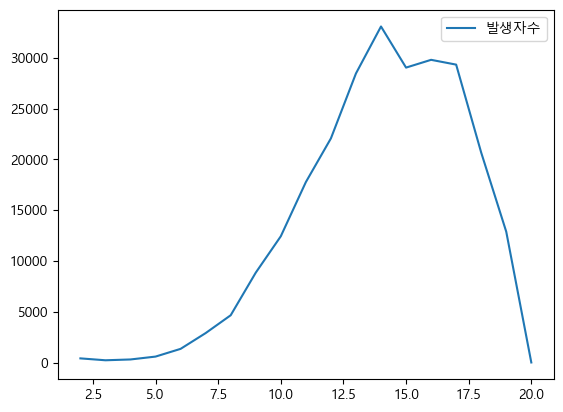

In [91]:
df1.plot()
plt.show()

In [92]:
df1 = df1.set_index('연령별')
df1

,발생자수
연령별,
0-4세,406.0
5-9세,220.0
10-14세,300.0
15-19세,583.0
20-24세,1344.0
25-29세,2896.0
30-34세,4652.0
35-39세,8845.0
40-44세,12427.0


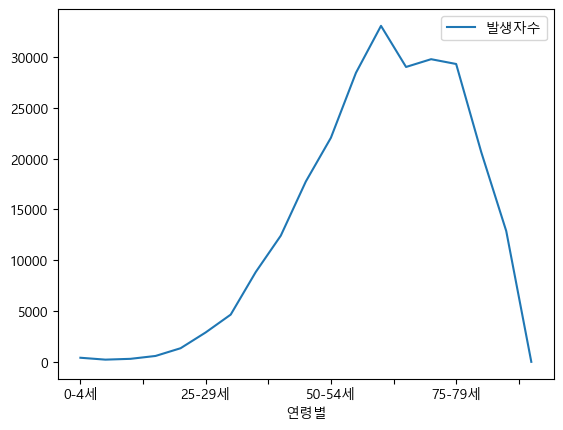

In [93]:
df1.plot()
plt.show()


In [94]:
df1 = df[(df['암종별']=='모든 암(C00-C96)') & (df['연령별']!="계") & (df['성별']=='계')]
df1 = df1[['연령별','발생자수','조발생률']]
df1

,연령별,발생자수,조발생률
2,0-4세,406.0,21.3
3,5-9세,220.0,9.5
4,10-14세,300.0,13.0
5,15-19세,583.0,21.4
6,20-24세,1344.0,40.1
7,25-29세,2896.0,84.4
8,30-34세,4652.0,147.6
9,35-39세,8845.0,223.3
10,40-44세,12427.0,322.2
11,45-49세,17759.0,396.5


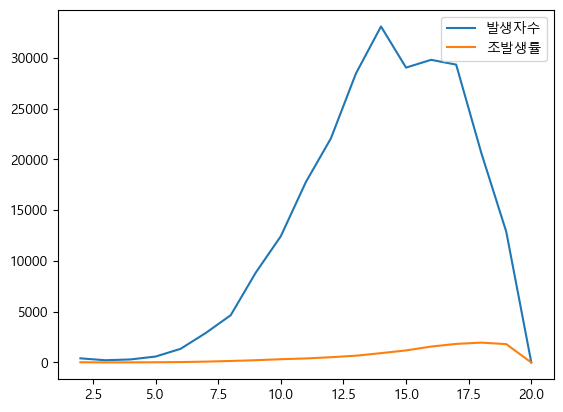

In [95]:
df1.plot()
plt.show()

df2 생성

In [116]:
df2 = df[df['연령별']!='계']
df2

,암종별,성별,연령별,발생자수,조발생률
2,모든 암(C00-C96),계,0-4세,406.0,21.3
3,모든 암(C00-C96),계,5-9세,220.0,9.5
4,모든 암(C00-C96),계,10-14세,300.0,13.0
5,모든 암(C00-C96),계,15-19세,583.0,21.4
6,모든 암(C00-C96),계,20-24세,1344.0,40.1
...,...,...,...,...,...
1496,기타 암(Re. C00-C96),여자,70-74세,1096.0,107.6
1497,기타 암(Re. C00-C96),여자,75-79세,1357.0,146.3
1498,기타 암(Re. C00-C96),여자,80-84세,1420.0,212.1
1499,기타 암(Re. C00-C96),여자,85세이상,1273.0,243.6


그룹별 평균값

In [117]:
df2.groupby(['암종별','성별']).mean()[['발생자수','조발생률']]

발생자수       조발생률
암종별          성별                        
간(C22)       계    821.315789  38.810526
             남자   607.421053  63.189474
             여자   213.894737  20.931579
갑상선(C73)     계   1614.526316  46.357895
             남자   395.578947  23.210526
...                      ...        ...
호지킨 림프종(C81) 남자     9.526316   0.678947
             여자     6.684211   0.515789
후두(C32)      계     64.315789   3.115789
             남자    60.736842   7.105263
             여자     3.578947   0.347368

[75 rows x 2 columns]

In [101]:
import seaborn as sns

In [121]:
df2 = df[(df['암종별'] != '모든 암(C00-C96)') & (df['연령별'] != "계")
         & (df['성별'] != '계')][['암종별', '성별', '발생자수']]
df2


,암종별,성별,발생자수
82,"입술, 구강 및 인두(C00-C14)",남자,0.0
83,"입술, 구강 및 인두(C00-C14)",남자,1.0
84,"입술, 구강 및 인두(C00-C14)",남자,3.0
85,"입술, 구강 및 인두(C00-C14)",남자,7.0
86,"입술, 구강 및 인두(C00-C14)",남자,18.0
...,...,...,...
1496,기타 암(Re. C00-C96),여자,1096.0
1497,기타 암(Re. C00-C96),여자,1357.0
1498,기타 암(Re. C00-C96),여자,1420.0
1499,기타 암(Re. C00-C96),여자,1273.0


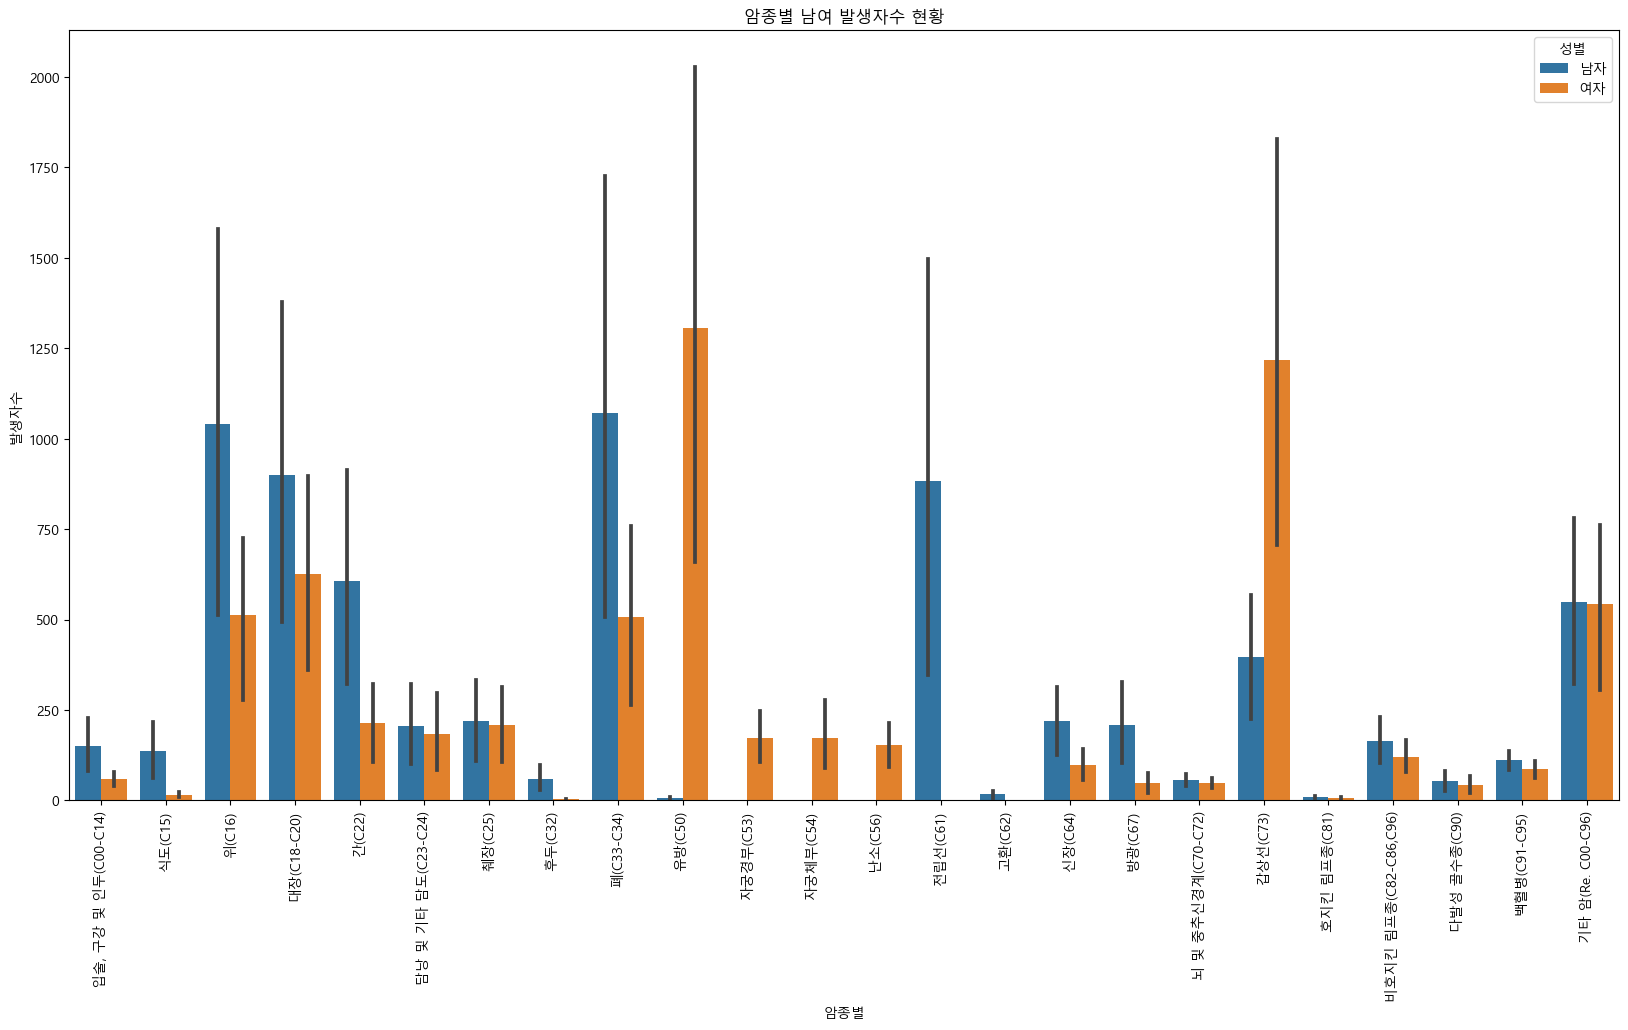

In [122]:
plt.figure(figsize=(20,10))
sns.barplot(x='암종별', y='발생자수', hue='성별', data=df2)
plt.title('암종별 남여 발생자수 현황')
plt.xticks(rotation=90)
plt.show()

In [108]:
df2 = df[(df['암종별']=='모든 암(C00-C96)') & (df['연령별']!="계") & (df['성별']!='계')][['연령별','발생자수','조발생률']]
df2

,연령별,발생자수,조발생률
22,0-4세,233.0,23.8
23,5-9세,127.0,10.6
24,10-14세,157.0,13.2
25,15-19세,273.0,19.2
26,20-24세,463.0,26.3
27,25-29세,895.0,49.4
28,30-34세,1415.0,86.9
29,35-39세,2673.0,132.4
30,40-44세,3745.0,191.1
31,45-49세,5728.0,251.9


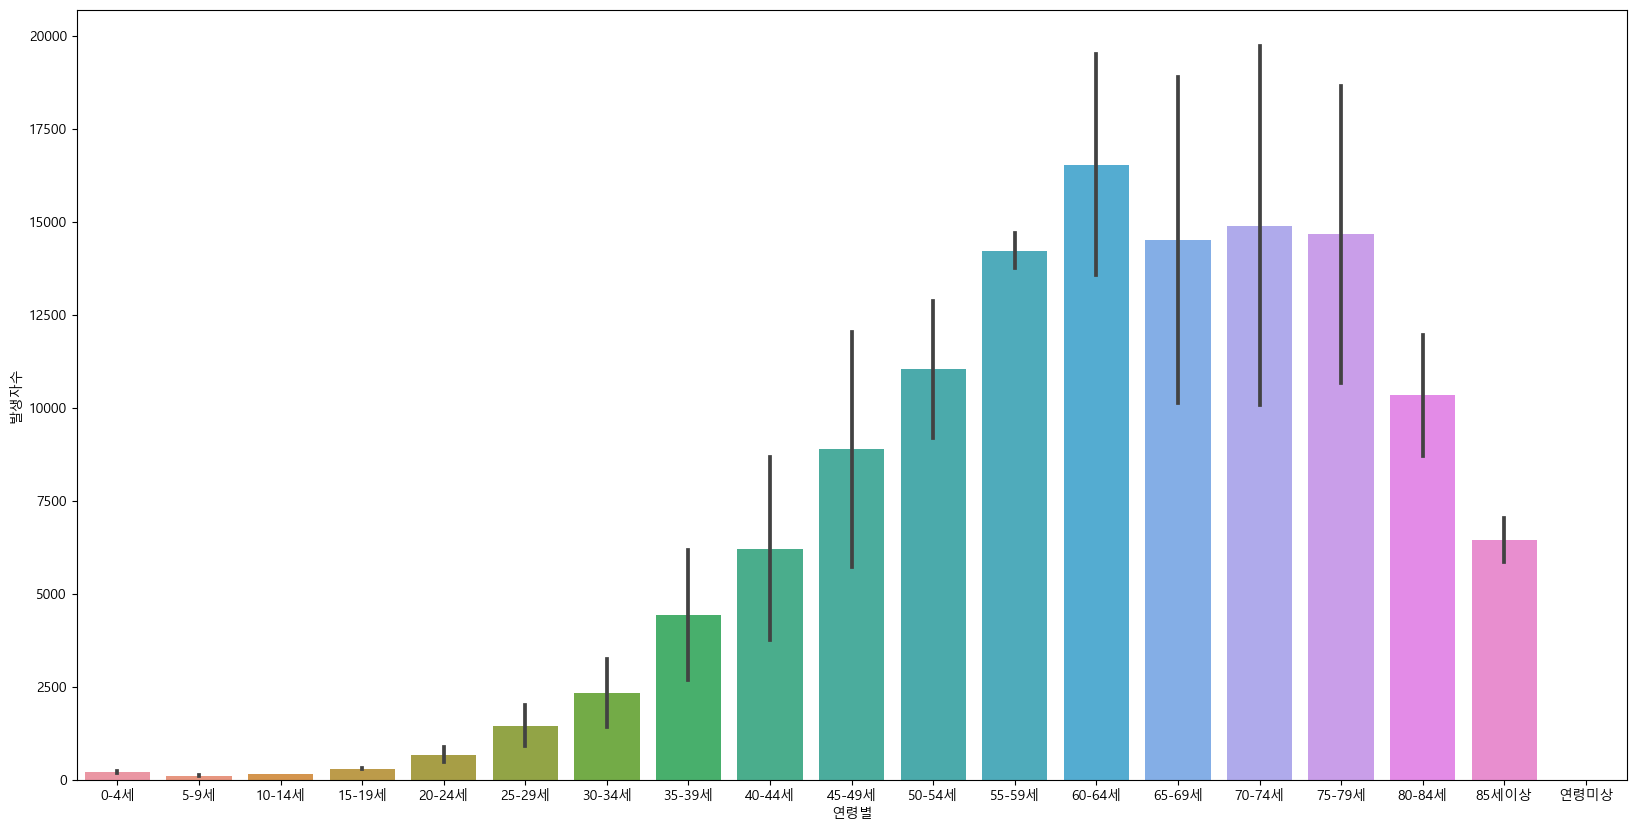

In [114]:
plt.figure(figsize=(20,10))
sns.barplot(x='연령별', y='발생자수', data=df2)
plt.show()